# Support Vector Machine (SVM) for Classification
"""
This notebook demonstrates how to implement and analyze **Support Vector Machine (SVM)** for classification tasks using Python.

### Topics covered:
- Theory of Support Vector Machine
- Data preprocessing
- Model training and evaluation
- Visualizing decision boundaries

## Theory of Support Vector Machine
Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression problems. For classification, SVM aims to find the optimal hyperplane that best separates the data points of different classes in a feature space.

### Key Concepts:
1. **Hyperplane**:
   - A decision boundary that separates data points of different classes.
   - In a 2D space, it is a line, while in higher dimensions, it becomes a plane or a hyperplane.

2. **Support Vectors**:
   - Data points that are closest to the hyperplane.
   - These points influence the position and orientation of the hyperplane.

3. **Margin**:
   - The distance between the hyperplane and the nearest data points (support vectors) on either side.
   - SVM aims to maximize this margin to achieve better generalization.

4. **Kernel Trick**:
   - SVM uses kernel functions to transform data into higher dimensions when the data is not linearly separable.
   - Common kernels:
     - **Linear Kernel**: For linearly separable data.
     - **Polynomial Kernel**: For polynomial decision boundaries.
     - **Radial Basis Function (RBF) Kernel**: For complex, non-linear relationships.
     - **Sigmoid Kernel**: Mimics the behavior of neural networks.

### How It Works:
1. **Linear Separability**:
   - For linearly separable data, SVM finds the hyperplane that maximizes the margin.

2. **Non-linear Separability**:
   - For non-linear data, SVM uses kernel functions to map the data into a higher-dimensional space where it becomes linearly separable.

3. **Soft Margin vs. Hard Margin**:
   - **Hard Margin**: Assumes perfect separability, which may lead to overfitting.
   - **Soft Margin**: Allows for some misclassifications by introducing a penalty term \(C\) to balance the trade-off between margin size and classification error.

### Mathematical Formulation:
The SVM optimization problem can be formulated as:
- **Objective**:
  $$ \text{Minimize } \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \xi_i $$
  where \(w\) is the weight vector, \(C\) is the penalty parameter, and \(\xi_i\) are slack variables for misclassification.

- **Subject to**:
  $$ y_i (w \cdot x_i + b) \geq 1 - \xi_i, \forall i $$
  where \(y_i\) is the true label and \(b\) is the bias term.

### Advantages:
- Effective for high-dimensional data.
- Works well for both linearly and non-linearly separable data.
- Robust to overfitting in high-dimensional spaces.

### Limitations:
- Computationally expensive for large datasets.
- Sensitive to the choice of kernel and hyperparameters.
- Performance may degrade on noisy data.

### Applications:
- Email spam detection.
- Sentiment analysis.
- Image classification.
- Disease diagnosis in medical data.

---
"""


#Breast Cancer Prediction

# Step: 1. Downloading and Installing Required Libraries

In [1]:
# 1. Installing Required Libraries
%pip install numpy pandas scikit-learn matplotlib seaborn

In [2]:
# 2. Data Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step: 2. Data Preprocessing

In [3]:
# Load the dataset from CSV
file_path = 'breast_cancer.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Display first few rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Display Information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
## Display Statistical summary of the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Step: 3. Feature Engineering

In [6]:
# 3. Feature Selection
# Assuming 'target' is the label column and everything else are features
X = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)  # Features: Drop the target column
y = df['diagnosis']  # Target: the 'target' column

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

# Step: 4. Data Splitting and Data Normalization

In [8]:
# 4. Splitting the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# 5. Normalization using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data


# Step: 5. Data Visualization

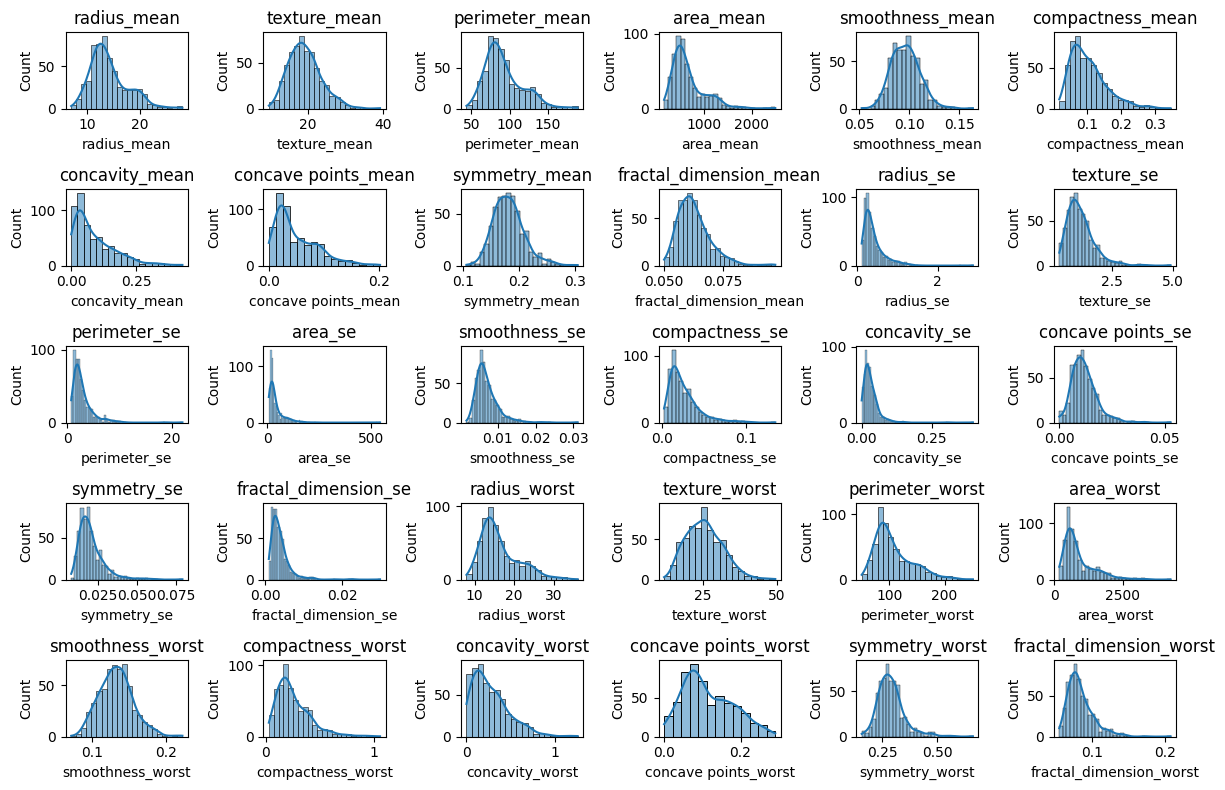

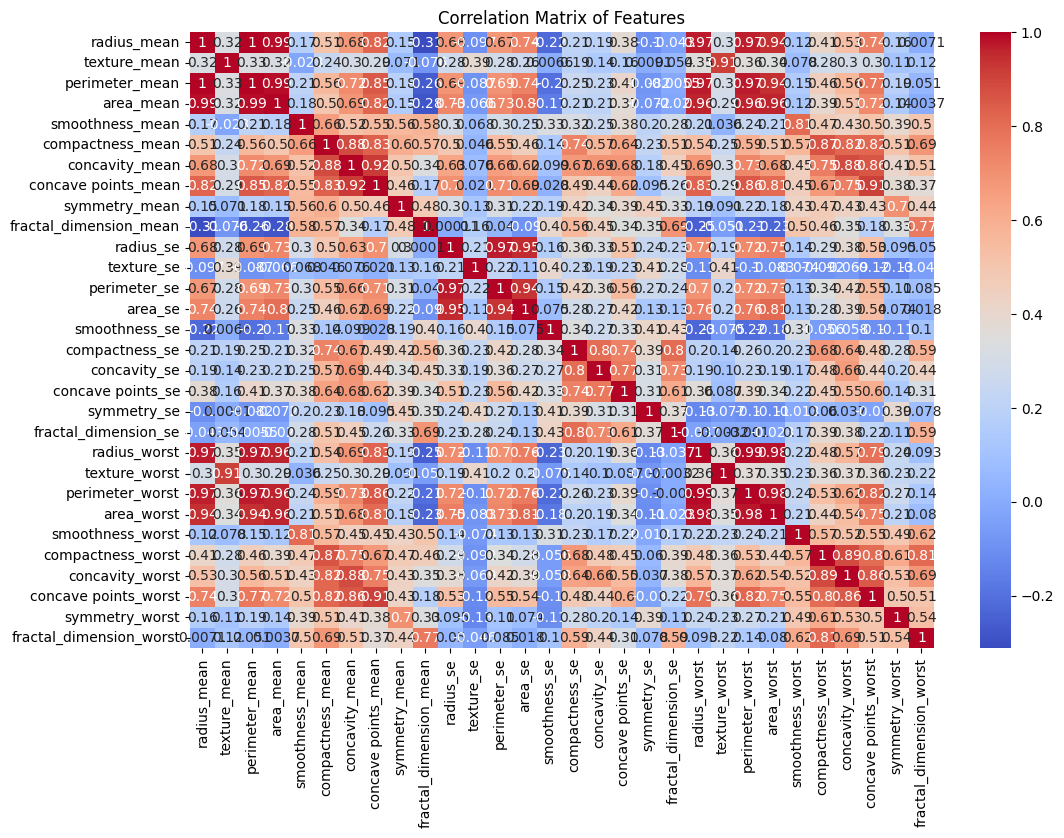

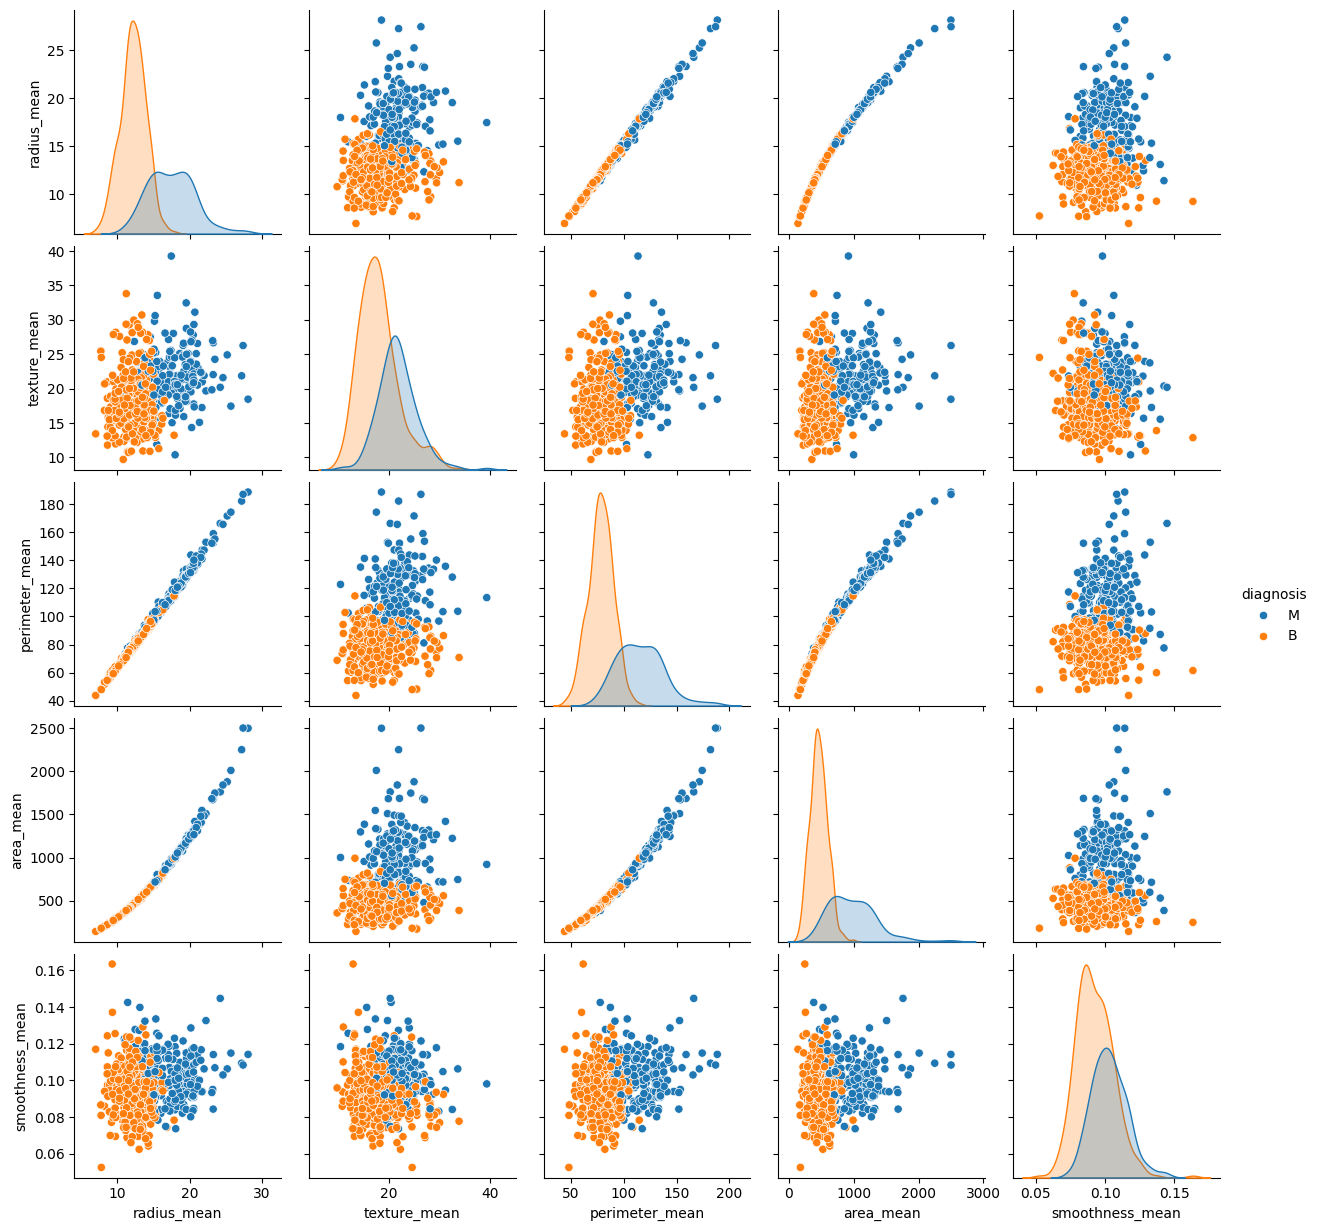

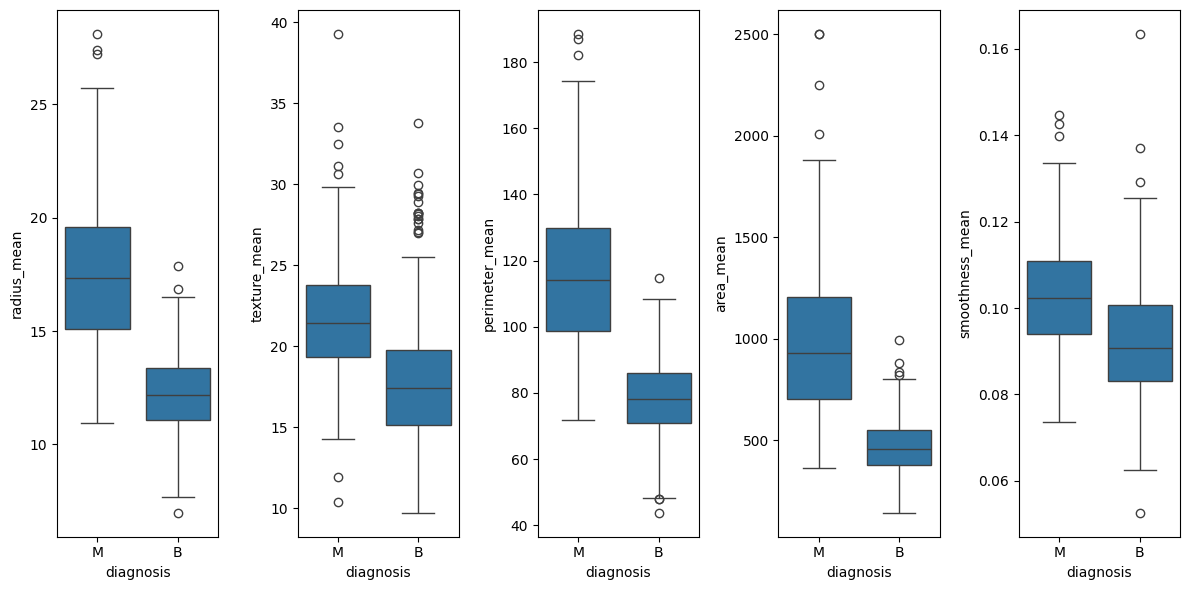

In [16]:
# data visualization

# Visualize the distribution of features
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns):
    plt.subplot(5, 6, i + 1)  # Adjust the subplot grid as needed
    sns.histplot(X[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Pairplot for selected features
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'] # Example features
sns.pairplot(df, hue='diagnosis', vars=selected_features) #hue parameter sets the color of data points based on a variable
plt.show()

# Boxplot to visualize distribution of features across target classes
plt.figure(figsize=(12, 6))
for i, col in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i + 1)
    sns.boxplot(x='diagnosis', y=col, data=df)
plt.tight_layout()
plt.show()

#Step: 6. Model Building

### Linear Model

In [17]:
#Linear Kernel SVM
# Initialize SVM with a linear kernel
svm_linear = SVC(kernel='linear')

# Train the model
svm_linear.fit(X_train_scaled, y_train)



SVC(kernel='linear')

### Non Linear Model

In [18]:
# Non-Linear (RBF) Kernel SVM
# Initialize SVM with RBF kernel (non-linear)
svm_rbf = SVC(kernel='rbf')

# Train the model
svm_rbf.fit(X_train_scaled, y_train)

SVC()

#Step: 8. Model Visualization

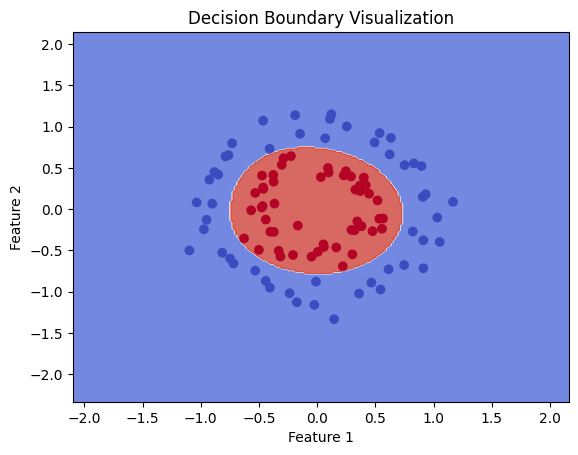

In [19]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
# Assuming X_train_scaled, y_train are defined from previous code
# Create sample data (replace with your actual data)
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=0)

# Create a meshgrid for visualization
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Train the model (replace with your actual model)
model = SVC(kernel='rbf', C=1.0).fit(X, y) #using sample data for demonstration, replace X, y

# Plot the decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary Visualization')
plt.show()

#Step: 8. Model Evaluation

In [20]:
# 7. Model Evaluation
# Predict on test set for linear SVM
y_pred_linear = svm_linear.predict(X_test_scaled)

# Predict on test set for non-linear SVM
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluate Linear Kernel SVM
print('Linear Kernel SVM Evaluation:')
print('Accuracy: ', accuracy_score(y_test, y_pred_linear))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_linear))
print('Classification Report:\n', classification_report(y_test, y_pred_linear))

# Evaluate Non-Linear (RBF) Kernel SVM
print('\nNon-Linear (RBF) Kernel SVM Evaluation:')
print('Accuracy: ', accuracy_score(y_test, y_pred_rbf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rbf))
print('Classification Report:\n', classification_report(y_test, y_pred_rbf))

Linear Kernel SVM Evaluation:
Accuracy:  0.9766081871345029
Confusion Matrix:
 [[106   2]
 [  2  61]]
Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Non-Linear (RBF) Kernel SVM Evaluation:
Accuracy:  0.9766081871345029
Confusion Matrix:
 [[106   2]
 [  2  61]]
Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

